# TO JEST NOTATNIK EKSPERYMENTALNY
Nie będzie dużo analizowania. Chodzi tylko o zastosowanie uczenia maszynowego w praktyce.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('001 houseprice.csv')

## Analiza wstępna

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

### Wnioski
1460 rekordów, 81 kolumn. Większość danych jest kompletna. Celem analizy jest predykcja ceny domu.

## Analiza szczegółowa

Kolumny z największą ilością brakujących danych zostaną usunięte.

In [173]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [174]:
df = df.dropna()

In [175]:
df.isnull().sum().sort_values(ascending = False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

Sprawdzimy rozkład danych

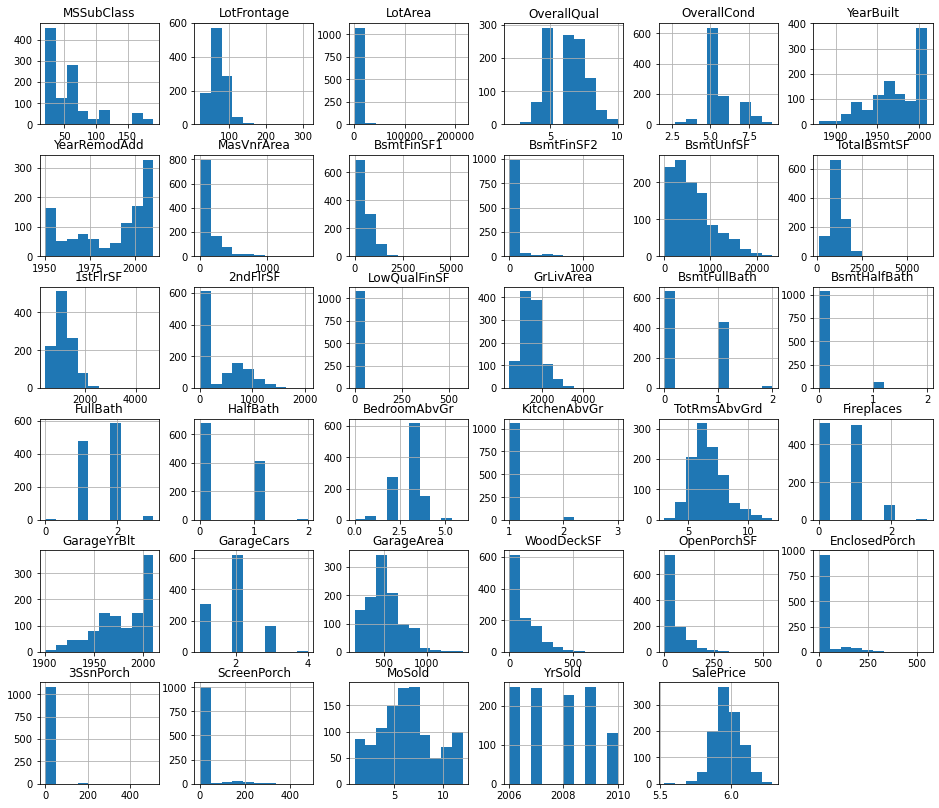

In [54]:
df.hist(figsize=(16,14));

<Figure size 1152x864 with 0 Axes>

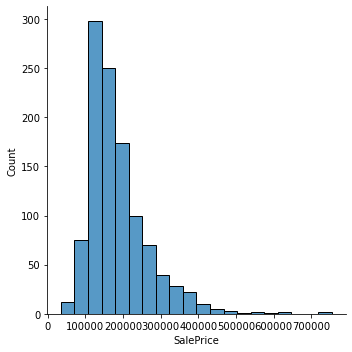

In [19]:
plt.figure(figsize=(16,12))

sns.displot(df.SalePrice, bins = 20);

In [17]:
df['SalePrice'].skew()

1.9319910146053174

Rozkład można zmienić na normalny.

<Figure size 1152x864 with 0 Axes>

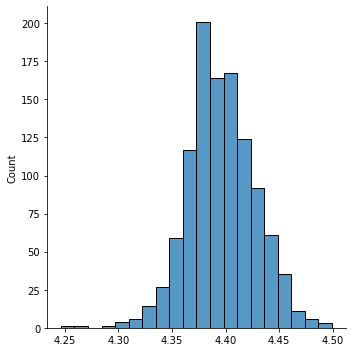

In [20]:
from scipy import stats

plt.figure(figsize=(16,12))

sns.displot(stats.boxcox(df['SalePrice'])[0], bins = 20);

In [27]:
exp = df
exp['SalePrice'] = stats.boxcox(exp['SalePrice'])[0]
exp['SalePrice'].skew()

0.003196747885221635

In [176]:
df['SalePrice'] = stats.boxcox(df['SalePrice'])[0]

In [36]:
df['PoolArea'].sort_values(ascending = False).head(10)

810     648
1170    576
1182    555
1386    519
197     512
1298    480
965       0
972       0
971       0
969       0
Name: PoolArea, dtype: int64

Mamy tylko 6 domów z basenem więc tę kategorię można usunąć.

In [177]:
df = df.drop('PoolArea', axis = 1)

Kolumna miscval jest zbyt ogólna.

In [178]:
df = df.drop(['MiscVal'], axis = 1)

In [179]:
df = df.drop(['Id'], axis = 1)

<AxesSubplot:>

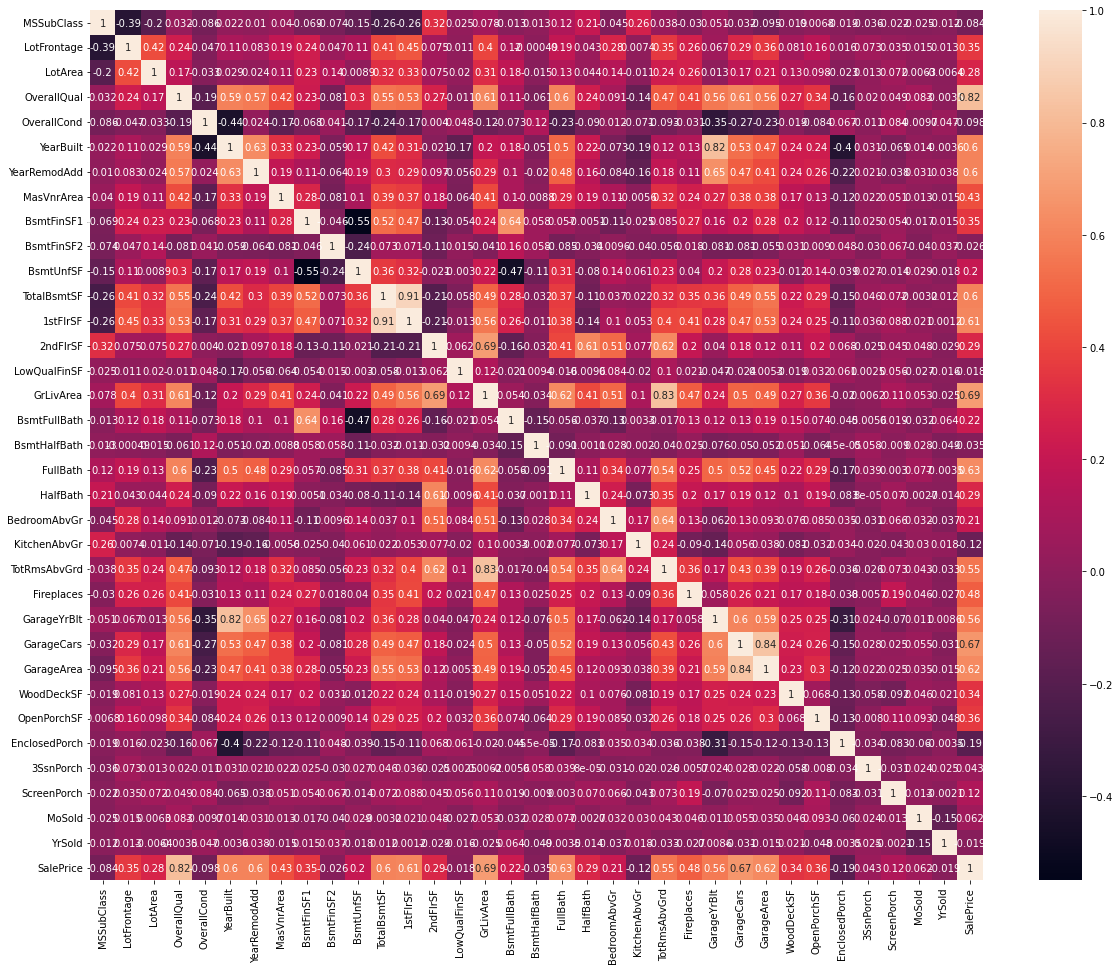

In [45]:
plt.figure(figsize=(20,16))

sns.heatmap(df.corr(), annot = True)

In [55]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,2,2008,WD,Normal,6.021443
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,5,2007,WD,Normal,5.988899
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,9,2008,WD,Normal,6.037416
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,2,2006,WD,Abnorml,5.925551
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,12,2008,WD,Normal,6.062724


## Przygotowanie do ML

In [242]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
le = LabelEncoder()

X = df.drop('SalePrice', axis = 1)
y= df['SalePrice']



In [250]:
# train.select_dtypes(include=['object']).shape[1]
X_cats = X.select_dtypes(include=['object'])
X_nums = X.select_dtypes(include=['int64', 'float64'])

In [246]:
X.isnull().sum().sort_values(ascending = False)

MSSubClass       0
MSZoning         0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
                ..
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
Length: 72, dtype: int64

In [251]:
X_cats.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [252]:
X_cats = le.fit_transform(X_cats.columns)


In [255]:
X_cats = pd.DataFrame(X_cats)

In [257]:
X_nums = sc.fit_transform(X_nums)
X_nums

array([[ 0.09226353, -0.23510813, -0.20495186, ..., -0.28236476,
        -1.60970692,  0.16037678],
       [-0.86108993,  0.37719538, -0.06485311, ..., -0.28236476,
        -0.49584267, -0.58941894],
       [ 0.09226353, -0.11264743,  0.13615815, ..., -0.28236476,
         0.98930965,  0.16037678],
       ...,
       [ 0.33060189, -0.1942879 , -0.13283146, ..., -0.28236476,
        -0.49584267,  1.65996821],
       [-0.86108993, -0.11264743, -0.05059958, ..., -0.28236476,
        -0.86713076,  1.65996821],
       [-0.86108993,  0.17309421, -0.02379808, ..., -0.28236476,
        -0.12455459,  0.16037678]])

In [258]:
X_nums = pd.DataFrame(X_nums)

In [259]:
X = pd.concat([X_cats, X_nums], axis = 1)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [269]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.69
mean absolute error: 0.01
mean squared error: 0.0
root mean squared error: 0.02


In [270]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4, min_samples_leaf = 3)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.72
mean absolute error: 0.01
mean squared error: 0.0
root mean squared error: 0.02


In [133]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()

params = {
    'max_depth': np.arange(2, 10),
    'min_samples_leaf': [2, 3, 4, 5, 6]
    }
grid_search = GridSearchCV(model, param_grid= params, cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [273]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()

params = {
    'max_depth': np.arange(2, 10),
    'min_samples_leaf': [2, 3, 4, 5, 6]
    }
grid_search = GridSearchCV(model, param_grid= params, cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 2}

In [274]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 8, min_samples_leaf = 2)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.83
mean absolute error: 0.01
mean squared error: 0.0
root mean squared error: 0.01


In [208]:
X_test = X_test.loc[:,~X_test.columns.duplicated()]


In [209]:
#test_df = test_df.loc[:,~test_df.columns.duplicated()]
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_train.shape


(820, 185)

In [210]:
X_test.shape

(274, 185)

In [276]:
from xgboost.sklearn import XGBRegressor

model = XGBRegressor(n_estimators=1000)
model.fit(X_train, y_train)

prediction = model.predict(X_test)


print(f'R2: {round(r2_score(y_test,prediction), 2)}')
print(f'mean absolute error: {round(mean_absolute_error(y_test,prediction), 2)}')
print(f'mean squared error: {round(mean_squared_error(y_test,prediction), 2)}')
print(f'root mean squared error: {round((np.sqrt(mean_squared_error(y_test,prediction))), 2)}')

R2: 0.83
mean absolute error: 0.01
mean squared error: 0.0
root mean squared error: 0.01


XGB i las losowy dały radę.